In [1]:
allure_etudier=3

In [2]:
import  sys

#LOCALISATION DES DONNEES
sys.path.insert(0, "C:/projets_python/diabolo")

import warnings
warnings.filterwarnings("ignore")



#LIBRAIRIES PERSO
import etude_variable.MyLog as log
import etude_variable.jouer as jouer

import etude_variable.analyse as ana

# LIBRAIRIE PYHTON CLASSIQUES
import pandas as pd
import numpy as np
import matplotlib
import scipy
import platform

from collections import Counter

#ESTIMATEUR
import sklearn
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import  RandomForestClassifier
from sklearn import neighbors, datasets
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer

from sklearn.ensemble import GradientBoostingClassifier



from scipy.stats import uniform
from scipy.stats import randint

#TRAINING
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from skopt import BayesSearchCV
import dask_searchcv as dcv
from skopt.space import Real, Integer
from sklearn.model_selection import cross_validate

#Evaluateur
from sklearn.model_selection import KFold

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

from sklearn.feature_selection import SelectFromModel


from evolutionary_search import EvolutionaryAlgorithmSearchCV
from sklearn.utils import class_weight

#outils
from dask.diagnostics import ProgressBar
import logging
from datetime import datetime


#Metriques
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import learning_curve
from sklearn import  metrics
from sklearn.metrics import  roc_auc_score
from sklearn.metrics import  classification_report

#Outils

import time


#Graphique
from matplotlib import pyplot
from matplotlib import pyplot as plt
import seaborn as sns

print('Operating system version....', platform.platform())
print("Python version is........... %s.%s.%s" % sys.version_info[:3])
print('scikit-learn version is.....', sklearn.__version__)
print('pandas version is...........', pd.__version__)
print('numpy version is............', np.__version__)
print('matplotlib version is.......', matplotlib.__version__)
print('scipy version is.......', scipy.__version__)


Operating system version.... Windows-10-10.0.17134-SP0
Python version is........... 3.6.5
scikit-learn version is..... 0.19.1
pandas version is........... 0.22.0
numpy version is............ 1.14.2
matplotlib version is....... 2.2.0
scipy version is....... 1.0.0


# LECTURE DES DONNEES

In [3]:
def plot_importance(feature_columns, model):
    importances = pd.DataFrame({'feature': feature_columns, 'importance': np.round(model.feature_importances_, 3)})
    importances = importances.sort_values('importance', ascending=False).set_index('feature')
    print("")
    print( importances)
    importances.plot.bar()
    
    
def metrique_classe(y_pred,y_true,xclass):
    from imblearn.metrics import specificity_score
    from imblearn.metrics import sensitivity_score


    from imblearn.metrics import geometric_mean_score



    # La sensibilité est le rapport où est le nombre de vrais positifs et le nombre de faux négatifs.
    # La sensibilité quantifie la capacité à éviter les faux négatifs.tp


    # estimator issu de quelques FIT




    log.traceLogInfo("Sensibilité  du re-equilibrage des données sur le TEST")
    #log.traceLogInfo("Binary ",sensitivity_score(y_true, y_pred, average='binary', pos_label=xclass))

    log.traceLogInfo("La spécificité est intuitivement la capacité du classificateur à trouver tous les échantillons positifs")

    log.traceLogInfo("Binary ")
    log.traceLogInfo(specificity_score(y_true, y_pred, labels=None, pos_label=xclass, average='binary', sample_weight=None))




    print("\nCalculer la moyenne géométrique")
    print(geometric_mean_score(y_true, y_pred,labels=None, pos_label=xclass))

    print("\n Calculer  sensitivity score")
    print("La sensibilité est le rapport où est le nombre de vrais positifs et le nombre de faux négatifs.")
    print("La sensibilité quantifie la capacité à éviter les faux négatifs.")

    print(sensitivity_score(y_true, y_pred, labels=None, pos_label=xclass,average='binary'))

    

In [4]:
def lecture_data(Fichier, xnames, xindex_col, allure=1, mode_debug=0, avec_index=True):
    if avec_index==True:
        df = pd.read_csv(Fichier,  index_col=xindex_col,     sep=';',     names=xnames,               skipinitialspace=True,              encoding='Latin-1')
    else:
        df = pd.read_csv(Fichier,   index_col=None,  sep=';',                     names=xnames,                         skipinitialspace=True,     encoding='Latin-1')

    df = df.groupby("ALLURE")
    df = df.get_group(allure)
    #print(df.info())


    return df




def split_dataset(dataset, train_percentage, feature_headers,
                                  target_header,random_state=42,mode_debug=0):

    train_x, test_x, train_y, test_y = train_test_split(dataset[feature_headers], dataset[target_header],
                                                        train_size=train_percentage, test_size=None, random_state=42)


    if mode_debug==1:
        # Train and Test dataset size details
        print("--------------------------------")
        print("Train_x Shape :: ", train_x.shape)
        print("Train_y Shape :: ", train_y.shape)
        print("Test_x Shape :: ", test_x.shape)
        print("Test_y Shape :: ", test_y.shape)
        print("--------------------------------")

    return train_x, test_x, train_y, test_y

In [5]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        print(start_time)
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))
        
        
def explo_variable(dataset, svariable):

     # On calcule le quantile 0,25 qui est le quartile Q1
    mediane = np.median(dataset)
    print ("La mediane              "+svariable+"    : ", round(mediane, 2))

    maxx = np.max(dataset)
    print ("Le max              "+svariable+"    : ", round(maxx, 2))
    
    minn = np.min(dataset)
    print ("Le min              "+svariable+"    : ", round(minn, 2))
    
    
    moy = np.mean(dataset)
    print ("La moyenne               "+svariable+"   : ", round(moy, 2))

    variance = np.var(dataset)
    print ("La variance est          "+svariable+"   : ", round(variance, 2))
    
    ecartType = np.std(dataset)
    print ("Le ecart type            "+svariable+"   : ", round(ecartType, 2))
     
    print("")      
    
   # print(dataset.describe())
    
    print("")    
    
def afficheEvalSet(mybest_model,
                    set_train,
                   set_train_cible,
                   set_test,
                   set_test_cible,
                   mode_debug=0,
                   type_eval=1):

    print("\nEVAL SET ....")

    set_test_cible_predicted = mybest_model.predict(set_test)
    set_train_cible_predicted = mybest_model.predict(set_train)

    if type_eval==1:
                print("Evaluation TEST-----------------------------------------------------------------------")
                set_test_cible_probabilities = mybest_model.predict_proba(set_test)
                score = set_test_cible_probabilities[:, 1]
                auc = roc_auc_score(set_test_cible, set_test_cible_predicted)
                print("TEST roc_auc_score :  %s" % auc)
    else:
                set_train_cible_probabilities = mybest_model.predict_proba(set_train)
                auc = roc_auc_score(set_train_cible, set_train_cible_predicted)
                print("TRAINING roc_auc_score :  %s" % auc)
    
    for x, y in [(set_train, set_train_cible), (set_test, set_test_cible)]:
            yp = mybest_model.predict(x)
            cm = confusion_matrix(y, yp.ravel())
            print(cm)

    import matplotlib.pyplot as plt

    
    
    plt.matshow(cm)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    if type_eval==1:
        ntotal = len(set_test)
        correct = set_test_cible == set_test_cible_predicted
        numCorrect = sum(correct)
        percent = round((100.0 * numCorrect) / ntotal, 3)

        log.traceLogInfo("Classification Correcte des données de test : {0:d}/{1:d}  {2:8.3f}%".format(numCorrect, ntotal, percent))

        prediction_score = 100.0 * mybest_model.score(set_test, set_test_cible)
        log.traceLogInfo('\nScore  TEST  : %8.3f  ************************' % prediction_score)
    else:
        ntotal = len(set_train)
        correct = set_train_cible== set_train_cible_predicted
        numCorrect = sum(correct)
        percent = round((100.0 * numCorrect) / ntotal, 3)

        log.traceLogInfo("\n CLASSIFICATION CORRECTE DES DONNEES DE Train  : {0:d}/{1:d}  {2:8.3f}%".format(numCorrect, ntotal, percent))

        prediction_score = 100.0 * mybest_model.score(set_train, set_train_cible)
        log.traceLogInfo('Score  TRAINING  : %8.3f  ************************' % prediction_score)
        
        
        
def courbe_de_roc(model, test_x,test_y):
    from sklearn.metrics import roc_curve, auc

    probas = model.predict_proba(test_x)
    # probas est une matrice de deux colonnes avec la proabilités d'appartenance à chaque classe

    fpr, tpr, thresholds = roc_curve(test_y, probas[:, 1])
    roc_auc = auc(fpr, tpr)
    print ("Area under the ROC curve : %f" % roc_auc)
        
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")        


In [6]:
def evaluation_2(model, train_x, train_y, test_x, test_y):    
    from sklearn.feature_selection import RFE
    rfc=model
    # create the RFE model and select 4 attributes
    rfe_model = RFE(rfc, 9, step=1)
    rfe_model = rfe_model.fit(train_x, train_y)
    # summarize the selection of the attributes
    print(rfe_model.support_)
    print(rfe_model.ranking_)

    # evaluate the model on testing set
    pred_y = rfe_model.predict(test_x)
    predictions = [round(value) for value in pred_y]
    accuracy = accuracy_score(test_y, predictions)
    print("Test Accuracy: %.2f%%" % (accuracy*100.0))
    print(train_x.mean()   )

# fit speciaux

In [7]:
def my_fit2(estimateur, train_x, train_y):
    kfold = StratifiedKFold(n_splits=10, random_state=None, shuffle=False)
    
    results = cross_val_score(estimateur, train_x, train_y, cv=kfold)
    print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
    
    y_pred = model.predict(test_x)
    predictions = [round(value) for value in y_pred]
    return model,y_pred,predictions


def fit_special(estimateur,    test_x,test_y, train_x, train_y):
    # Use SelectFromModel
    thresholds = np.sort(estimateur.best_estimator_.named_steps["clf"].feature_importances_)

    for thresh in thresholds:
        # select features using threshold
        selection = SelectFromModel(estimateur, threshold=thresh, prefit=True)
        select_X_train = selection.transform(train_x)

        # train model
        selection_model = estimateur
        selection_model.fit(select_X_train, train_y)

        # eval model
        select_X_test = selection.transform(test_x)
        y_pred = selection_model.predict(select_X_test)
        predictions = [round(value) for value in y_pred]
        accuracy = accuracy_score(test_y, predictions)
        print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy * 100.0))
        print(confusion_matrix(test_y, predictions))
        print(classification_report(test_y, predictions))

    y_pred = estimateur.predict(test_x)
    predictions = [round(value) for value in y_pred]
    return estimateur,y_pred,predictions


In [8]:

def my_drop(df, col):
    if col in df:
        df.drop([col], axis=1, inplace=True)
    return df




def encodage(df_x):
    
    from sklearn import preprocessing
    #le = preprocessing.LabelEncoder()
    #df_gagnant[['HIPPO']] = le.fit_transform(df_gagnant[['HIPPO']])
    #df_gagnant[['PAR_PROPRIO']] = le.fit_transform(df_gagnant[['PAR_PROPRIO']])
    ##f_gagnant[['NOM_JOC']] = le.fit_transform(df_gagnant[['NOM_JOC']])
    #df_gagnant[['NOM_ENTR']] = le.fit_transform(df_gagnant[['NOM_ENTR']])
    #df_gagnant[['CHEVAL']] = le.fit_transform(df_gagnant[['CHEVAL']])
    #df_gagnant[['PAR_NUM']] = le.fit_transform(df_gagnant[['PAR_NUM']])
   # df_gagnant[['MUSIC_CHEVAL']] = le.fit_transform(df_gagnant[['MUSIC_CHEVAL']])



    from sklearn.preprocessing import RobustScaler
    from sklearn.preprocessing import quantile_transform





    #scaler = RobustScaler()
    scaler = RobustScaler( with_scaling=False, quantile_range=(25.0, 75.0), copy=False)

    critere_scale = ['CO_PRIX','PAR_CARRIERE',
                     'PAR_CLASSE_AGE',
                     'PAR_COTEDER','PAR_ENT_REU_PLACE',
                     'PAR_ENT_REUSSITE_GAGNE',
                     'PAR_ENT_VICTOIRE',
                     'PAR_GAIN',
                     'pAR_JOC_ECART_GAGNANT',
                     'PAR_JOC_ECART_PLACE',
                     'PAR_JOC_NB_COURSE',
                    'PAR_JOC_PLACE_3P',
                     'pAR_JOC_RAPPORT_GAGNANT_M',
                     'PAR_JOC_REU_PLACE',
                     'pAR_JOC_REUSSITE_GAGNE',
                     'pAR_JOC_VICTOIRE',
                    'PAR_PLACE_Q',
                     'PAR_REUSSITE_3P',
                     'PAR_REUSSITE_GAGNE', 
                     'PAR_REUSSITE_QUINTE',
                     'PAR_RUESSITE_PLACE',
                     'PAR_ENT_ECART_PLACE',
                     'PAR_VICTOIRE',
                     'PAR_VICTOIRE_Q',
                     'PAR_ENT_NB_COURSE',
                     'MY_REUSSITE_CHEVAL',
                     'POIDS',
                     'CO_PRIX',                     
                     'MY_REUSSITE_JOC',
                     'MY_REUSSITE_ENT',
                     'CLA_AGE_PRIX' ]
    
    

     

    #df_gagnant[critere_scale] = quantile_transform(df_gagnant[critere_scale], n_quantiles=4)

    #df_gagnant[critere_scale] = qt.fit_transform(df_gagnant[critere_scale])
    df_x[critere_scale] = quantile_transform(df_x[critere_scale], n_quantiles=50, random_state=0,subsample=300000)

    #df_x[critere_scale] = scaler.fit_transform(df_x[critere_scale])

    return df_x,critere_scale


In [9]:
def suppression_colonne(df2,allure):

    # df=my_drop(df, "PAR_AGE")
    print('Suppression colonnne ', allure)

    if  allure==0:

        df2.drop(["FIN_ligne"], axis=1, inplace=True)

        df2.drop(["PAR_NP"], axis=1, inplace=True)
        df2.drop(["cendre"], axis=1, inplace=True)
        df2.drop(["MUSIC_CHEVAL"], axis=1, inplace=True)
        df2.drop(["MUSIC_ENT"], axis=1, inplace=True)
        df2.drop(["MUSIC_JOC"], axis=1, inplace=True)
        df2.drop(["grande_piste"], axis=1, inplace=True)
        df2.drop(["PAR_VALEUR"], axis=1, inplace=True)
        df2 = my_drop(df2, 'PAR_REUSSITE_GAGNE')
        df2 = my_drop(df2, 'PAR_RUESSITE_PLACE')
        df2 = my_drop(df2, 'pAR_JOC_REUSSITE_GAGNE')
        df2 = my_drop(df2, 'PAR_JOC_REU_PLACE')
        df2 = my_drop(df2, 'PAR_JOC_ECART_PLACE')
        df2 = my_drop(df2, 'PAR_ENT_REUSSITE_GAGNE')
        df2 = my_drop(df2, 'PAR_ENT_REU_PLACE')

        df2 = my_drop(df2, 'PAR_CARRIERE_Q')
        df2 = my_drop(df2, 'PAR_REUSSITE_QUINTE')
        
        
        df2 = my_drop(df2, 'PAR_ENT_ECART_PLACE')

        df2 = my_drop(df2, 'CHEVAL')
        df2 = my_drop(df2, 'NOM_JOC')
        df2 = my_drop(df2, 'NOM_ENTR')
        df2 = my_drop(df2, 'ALLURE')


        df2 = my_drop(df2, 'PAR_PLACE_Q')
        df2 = my_drop(df2, 'autostart')

        df2 = my_drop(df2, 'PAR_PLACE')

        df2 = my_drop(df2, 'PAR_JOC_PLACE_3P')

        df2 = my_drop(df2, 'PAR_ARRIVE')
        df2 = my_drop(df2, 'HIPPO')
        df2 = my_drop(df2, 'PAR_PROPRIO')
        
        df2 = my_drop(df2, 'CO_DISTANCE')
        df2 = my_drop(df2, 'Nb_partant')
        df2 = my_drop(df2, 'PAR_ENT_RAPPORT_GAGNANT_M')
        df2 = my_drop(df2, 'PAR_VICTOIRE_Q')
        



   

    if allure == 1:
        df2 = my_drop(df2, "POIDS")
        df2 = my_drop(df2, "CORDE")
   
    if allure==2:
        
        df2 = my_drop(df2, "MY_auto_start")
        df2 = my_drop(df2, "PAR_VICTOIRE_Q")
        
        
        

    if allure == 3:
        df2 = my_drop(df2, "POIDS")
        df2 = my_drop(df2, "CORDE")
        df2 = my_drop(df2, "MY_auto_start")



    if allure == 4:
        df2 = my_drop(df2, "CORDE")
        df2 = my_drop(df2, "MY_auto_start")


    if allure == 5:
        df2 = my_drop(df2, "CORDE")
        df2 = my_drop(df2, "MY_auto_start")


    return df2

# selection

In [10]:
  # Lecture des données sans index
xnames = ['ALLURE', 'CO_DISTANCE',
              'CO_PRIX', 'HIPPO',
              'IDCOURSE', 'IDPARTCIPANT',
              'PAR_AGE', 'PAR_ARRIVE',
              'PAR_CARRIERE',
              'PAR_CARRIERE_Q',
              'PAR_CLASSE_AGE',
              'PAR_COTEDER',
              'PAR_ENT_ECART_GAGNANT',
              'PAR_ENT_RAPPORT_GAGNANT_M',
              'PAR_ENT_REU_PLACE',
              'PAR_ENT_REUSSITE_GAGNE',
              'PAR_ENT_VICTOIRE',
              'PAR_GAIN',
              'pAR_JOC_ECART_GAGNANT',
              'PAR_JOC_ECART_PLACE',
              'PAR_JOC_NB_COURSE',
              'PAR_JOC_PLACE_3P',
              'pAR_JOC_RAPPORT_GAGNANT_M',
              'PAR_JOC_REU_PLACE',
              'pAR_JOC_REUSSITE_GAGNE',
              'pAR_JOC_VICTOIRE',
              'PAR_NP',
              'PAR_NUM',
              'PAR_PLACE',
              'PAR_PLACE_Q',
              'PAR_REUSSITE_3P',
              'PAR_REUSSITE_GAGNE',
              'PAR_REUSSITE_QUINTE',
              'PAR_RUESSITE_PLACE',
              'autostart',
              'cendre',
              'grande_piste',
              'Point',
              'Nb_partant',
              'PAR_PROPRIO',
              'NOM_JOC',
              'NOM_ENTR',
              'POIDS',
              'CORDE', 'CHEVAL',
              'MUSIC_CHEVAL',
              'MUSIC_ENT',
              'MUSIC_JOC',
              'PAR_VALEUR',
              'PAR_ENT_ECART_PLACE',
              'PAR_VICTOIRE',
              'PAR_VICTOIRE_Q',
          'PAR_ENT_NB_COURSE',
              'FIN_ligne']

# Creating bins for the win column
def assign_selection(W):
    if W < 4:
        return 1
    else:
        return 0
    
    # Creating bins for the win column
def assign_selection2(W):
    if W == 1.0:
        return 1
    if W == 0.0:
        return 0



index_col = ['IDPARTCIPANT', 'IDCOURSE']
start_time=timer()
df = lecture_data('d:\data_diabolo.csv', xnames, xindex_col=index_col, allure=allure_etudier, avec_index=False)
timer(start_time)
    

2018-06-11 16:15:38.593808

 Time taken: 0 hours 0 minutes and 2.4 seconds.


In [11]:
df.describe()

,ALLURE,CO_DISTANCE,CO_PRIX,HIPPO,IDCOURSE,IDPARTCIPANT,PAR_AGE,PAR_ARRIVE,PAR_CARRIERE,PAR_CARRIERE_Q,...,NOM_JOC,NOM_ENTR,POIDS,CORDE,CHEVAL,PAR_VALEUR,PAR_ENT_ECART_PLACE,PAR_VICTOIRE,PAR_VICTOIRE_Q,PAR_ENT_NB_COURSE
count,38464.0,38464.000000,38464.000000,38464.000000,38464.000000,38464.000000,38464.000000,38464.000000,38464.000000,38464.00000,...,38464.000000,38464.000000,38464.000000,38464.0,38464.000000,38464.0,38464.000000,38464.000000,38464.000000,38464.000000
mean,3.0,1.125624,34451.065854,46.145487,31742.748492,392013.476861,5.329087,63.456011,75.422811,29.50624,...,1022.341514,1204.291311,50.592996,0.0,21496.753302,0.0,4.135087,4.161762,0.353265,169.202995
std,0.0,0.376803,36441.681784,45.244650,14152.186467,175888.009691,1.889166,46.364999,262.042207,253.68967,...,1285.263936,1196.035914,22.751114,0.0,18682.899453,0.0,5.692211,4.937836,3.121898,201.756279
min,3.0,0.000000,0.000000,1.000000,1615.000000,19819.000000,0.000000,1.000000,0.000000,0.00000,...,1.000000,1.000000,0.000000,0.0,4.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,3.0,1.000000,20000.000000,1.000000,21604.000000,265119.000000,4.000000,4.000000,23.000000,0.00000,...,58.000000,372.000000,55.000000,0.0,6684.000000,0.0,0.000000,1.000000,0.000000,38.000000
50%,3.0,1.000000,23000.000000,34.000000,31515.000000,388926.500000,5.000000,99.000000,41.000000,0.00000,...,546.000000,981.000000,57.000000,0.0,15709.000000,0.0,2.000000,3.000000,0.000000,97.000000
75%,3.0,1.000000,38000.000000,80.000000,42209.000000,523097.250000,7.000000,99.000000,66.000000,0.00000,...,1393.000000,1692.750000,63.000000,0.0,32100.000000,0.0,6.000000,6.000000,0.000000,199.000000
max,3.0,6.000000,700000.000000,286.000000,56523.000000,699187.000000,13.000000,99.000000,5000.000000,5200.00000,...,8848.000000,9687.000000,72.000000,0.0,82159.000000,0.0,48.000000,270.000000,135.000000,898.000000


In [12]:
def MY_REUSSITE_CHEVAL(par_reussite_gagne,par_reussite_place):
        if par_reussite_place==0.0:
            return 0
        return par_reussite_gagne/par_reussite_place


def Gest_ecart_joc(ecart,nb_course, reussite):
    if nb_course > 100:
        if reussite >0.20:
            if ecart>6:
                 return 1
                
    return 0          

                
def Gest_ecart_ENT(ecart,nb_course, reussite):
    if nb_course > 200:
        if reussite >0.30:
            if ecart>10:
                 return 1
                
                
                
    return 0     



def Gest_autostart(auto_s,num):
    if auto_s >= 1:
        if num<=9:
              return 1
                                        
    return 0     

def relation_1(A,B):
    if B==0:
        return 0
                                           
    return A/B



def CHEVAL_QUINTE(nb_q):
    if nb_q > 0:
                 return 1
    
    
    return 0

In [13]:
def transformation(df2,allure_etudier):
    #Filtre des données¶
    print('\n\n----------- TRANSFORMATION --------- AJOUT DE COLONNE------------\n')
    start_time=timer()
    df2=df2[df2.Point>0]

    df2 = df2[df2.PAR_COTEDER > 0]
    df2 = df2[df2.CO_PRIX > 0]
    df2 = df2[df2.PAR_GAIN >= 0]
    df2 = df2[df2.PAR_GAIN < 1000000]



    #df2 = ld.my_drop(df2, 'PAR_COTEDER')
    df2 = df2[df2.PAR_ARRIVE > 0]  # On garde la ligne qui possede information arrivée

#df2 = df2.groupby("ALLURE")
#df2 = df2.get_group(allure_etudier)
    df2 = my_drop(df2, 'ALLURE')

    if allure_etudier == 2 or allure_etudier == 4 or allure_etudier == 5:
        df2 = df2[df2.POIDS > 20]
        df2 = df2[df2.POIDS < 80]
    #  on a lu les données avant l 'ajout de la colonne SELECTIOB
    df2['SELECTION2'] = df2['PAR_ARRIVE'].apply(assign_selection)

    # lamba avec 2 parametres
    df2['MY_REUSSITE_CHEVAL'] = df2.apply(lambda x: MY_REUSSITE_CHEVAL(x['PAR_REUSSITE_GAGNE'], x['PAR_RUESSITE_PLACE']), axis=1)
    df2['MY_REUSSITE_JOC'] = df2.apply(lambda x: MY_REUSSITE_CHEVAL(x['pAR_JOC_REUSSITE_GAGNE'], x['PAR_JOC_REU_PLACE']), axis=1)
    df2['MY_REUSSITE_ENT'] = df2.apply(lambda x: MY_REUSSITE_CHEVAL(x['PAR_ENT_REUSSITE_GAGNE'], x['PAR_ENT_REU_PLACE']), axis=1)
    
    #df2['MY_ECART_JOC'] = df2.apply(lambda x: Gest_ecart_joc(x['PAR_JOC_ECART_PLACE'], x['PAR_JOC_NB_COURSE'], x['PAR_JOC_REU_PLACE']), axis=1)

    # gestion des correlations
    df2['CLA_AGE_PRIX']= df2.apply(lambda x: relation_1(x['PAR_CLASSE_AGE'], x['CO_PRIX']), axis=1) 

    #f2['MY_ECART_ENT'] = df2.apply(lambda x: Gest_ecart_ENT(x['PAR_ENT_ECART_PLACE'], x['PAR_JOC_NB_COURSE'], x['PAR_ENT_REU_PLACE'] ), axis=1)
    if (allure_etudier==1):
        df2['MY_auto_start'] = df2.apply(lambda x: Gest_autostart(x['autostart'], x['PAR_NUM']), axis=1)
    else:
        df2['MY_auto_start'] =0
        
        
        
    
    

    #df2['CHEVAL_QUINTE'] = df2.apply(lambda x: CHEVAL_QUINTE(x['PAR_CARRIERE_Q']), axis=1)    
    timer(start_time)
    return df2
   


# Filtre des données  :  TRI DIVERS 

In [14]:
df2=transformation(df,allure_etudier)


    





----------- TRANSFORMATION --------- AJOUT DE COLONNE------------

2018-06-11 16:15:41.289597

 Time taken: 0 hours 0 minutes and 2.78 seconds.


In [15]:

df2, critere_scale = encodage(df2)

In [16]:
df2 = suppression_colonne(df2=df2,allure=0)
df2 = suppression_colonne(df2=df2,allure=allure_etudier)


Suppression colonnne  0
Suppression colonnne  3


In [17]:
df2.describe()




,CO_PRIX,IDCOURSE,IDPARTCIPANT,PAR_AGE,PAR_CARRIERE,PAR_CLASSE_AGE,PAR_COTEDER,PAR_ENT_ECART_GAGNANT,PAR_ENT_VICTOIRE,PAR_GAIN,...,PAR_NUM,PAR_REUSSITE_3P,Point,PAR_VICTOIRE,PAR_ENT_NB_COURSE,SELECTION2,MY_REUSSITE_CHEVAL,MY_REUSSITE_JOC,MY_REUSSITE_ENT,CLA_AGE_PRIX
count,3.703900e+04,37039.000000,37039.000000,37039.000000,3.703900e+04,3.703900e+04,3.703900e+04,37039.000000,3.703900e+04,3.703900e+04,...,37039.000000,3.703900e+04,37039.000000,3.703900e+04,3.703900e+04,37039.000000,3.703900e+04,3.703900e+04,3.703900e+04,3.703900e+04
mean,4.997138e-01,31823.616863,393011.473285,5.347661,4.998826e-01,4.983643e-01,5.004645e-01,11.193499,4.818957e-01,4.983363e-01,...,7.626205,4.986780e-01,164.124841,4.878862e-01,4.993601e-01,0.228246,4.847782e-01,4.841066e-01,4.823047e-01,4.984335e-01
std,2.868200e-01,14070.472459,174888.552516,1.884827,2.877218e-01,2.905082e-01,2.867272e-01,15.747574,3.114692e-01,2.905934e-01,...,4.429289,2.899018e-01,53.275404,3.038015e-01,2.893815e-01,0.419708,3.103641e-01,3.122699e-01,3.128784e-01,2.904767e-01
min,1.000000e-07,1615.000000,19819.000000,0.000000,1.000000e-07,1.000000e-07,1.000000e-07,0.000000,1.000000e-07,1.000000e-07,...,1.000000,1.000000e-07,1.000000,1.000000e-07,1.000000e-07,0.000000,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07
25%,2.857143e-01,21664.000000,265946.000000,4.000000,2.551020e-01,2.502255e-01,2.551020e-01,1.000000,2.244898e-01,2.498615e-01,...,4.000000,2.476805e-01,128.000000,2.244898e-01,2.482993e-01,0.000000,2.653055e-01,2.546939e-01,2.448980e-01,2.499599e-01
50%,5.000000e-01,31561.000000,389477.000000,5.000000,4.897959e-01,5.003711e-01,4.897959e-01,6.000000,4.795918e-01,4.991388e-01,...,7.000000,4.986365e-01,165.000000,5.102041e-01,5.020408e-01,0.000000,4.987772e-01,4.897959e-01,4.955102e-01,5.006449e-01
75%,7.448980e-01,42217.500000,523208.000000,7.000000,7.482993e-01,7.501299e-01,7.448980e-01,15.000000,7.551020e-01,7.500156e-01,...,11.000000,7.486314e-01,201.000000,7.551020e-01,7.478992e-01,0.000000,7.551006e-01,7.551020e-01,7.508503e-01,7.504483e-01
max,9.999999e-01,56523.000000,699187.000000,13.000000,9.999999e-01,9.999999e-01,9.999999e-01,121.000000,9.999999e-01,9.999999e-01,...,20.000000,9.999999e-01,364.000000,9.999999e-01,9.999999e-01,1.000000,9.999999e-01,9.999999e-01,9.999999e-01,9.999999e-01


# Definition de la cible

In [18]:
Lib_features_df = df2.columns
xdata = df2.values
df_gagnant = pd.DataFrame(data=xdata, columns=Lib_features_df)

df_gagnant['SELECTION'] = df_gagnant['SELECTION2'].apply(assign_selection2)
df_gagnant.drop(["SELECTION2"], axis=1, inplace=True)
df_gagnant = df_gagnant.set_index(index_col)

df_gagnant_len = len(df_gagnant.columns) - 1
Lib_features = df_gagnant.columns[:df_gagnant_len]

feature_columns = Lib_features  ##<<<<<<<<<<<<<<<<
response_column = ['SELECTION']  ##<<<<<<<<<<<<<<<<
log.traceLogdebug("Features                   : %s " % Lib_features, " <<<<************")

print("(1) Shape df_gagnant  ", df_gagnant.shape,"\n")
print("(2) FEATURES ",Lib_features)
print("(3) response column ",response_column)
# df_gagnant, feature_columns, response_column, ratio SONT DEFINI


(1) Shape df_gagnant   (37039, 22) 

(2) FEATURES  Index(['CO_PRIX', 'PAR_AGE', 'PAR_CARRIERE', 'PAR_CLASSE_AGE', 'PAR_COTEDER',
       'PAR_ENT_ECART_GAGNANT', 'PAR_ENT_VICTOIRE', 'PAR_GAIN',
       'pAR_JOC_ECART_GAGNANT', 'PAR_JOC_NB_COURSE',
       'pAR_JOC_RAPPORT_GAGNANT_M', 'pAR_JOC_VICTOIRE', 'PAR_NUM',
       'PAR_REUSSITE_3P', 'Point', 'PAR_VICTOIRE', 'PAR_ENT_NB_COURSE',
       'MY_REUSSITE_CHEVAL', 'MY_REUSSITE_JOC', 'MY_REUSSITE_ENT',
       'CLA_AGE_PRIX'],
      dtype='object')
(3) response column  ['SELECTION']


In [19]:
#df_gagnant[[    'PAR_ENT_ECART_GAGNANT', 'PAR_ENT_RAPPORT_GAGNANT_M',    'PAR_ENT_REU_PLACE', 'PAR_ENT_REUSSITE_GAGNE', 'PAR_ENT_VICTOIRE',    'PAR_JOC_REU_PLACE', 'pAR_JOC_REUSSITE_GAGNE', 'pAR_JOC_VICTOIRE']].describe()

In [20]:
#df_gagnant[critere_scale].head(5)

# Suppression de colonnes

In [21]:
#df_gagnant_len = len(df_gagnant.columns) - 1
#Lib_features = df_gagnant.columns[:df_gagnant_len]
feature_columns = Lib_features  ##<<<<<<<<<<<<<<<<
#response_column = ['SELECTION']  ##<<<<<<<<<<<<<<<<
log.traceLogdebug("Features                   : %s " % Lib_features, " <<<<************")

print("(1) Shape df_gagnant  ", df_gagnant.shape,"\n")
print("(2) FEATURES\n ",Lib_features,"\n")
print("(3) response column ",response_column,"\n")
df_gagnant.info()
    

(1) Shape df_gagnant   (37039, 22) 

(2) FEATURES
  Index(['CO_PRIX', 'PAR_AGE', 'PAR_CARRIERE', 'PAR_CLASSE_AGE', 'PAR_COTEDER',
       'PAR_ENT_ECART_GAGNANT', 'PAR_ENT_VICTOIRE', 'PAR_GAIN',
       'pAR_JOC_ECART_GAGNANT', 'PAR_JOC_NB_COURSE',
       'pAR_JOC_RAPPORT_GAGNANT_M', 'pAR_JOC_VICTOIRE', 'PAR_NUM',
       'PAR_REUSSITE_3P', 'Point', 'PAR_VICTOIRE', 'PAR_ENT_NB_COURSE',
       'MY_REUSSITE_CHEVAL', 'MY_REUSSITE_JOC', 'MY_REUSSITE_ENT',
       'CLA_AGE_PRIX'],
      dtype='object') 

(3) response column  ['SELECTION'] 

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 37039 entries, (19831.0, 1615.0) to (699187.0, 56523.0)
Data columns (total 22 columns):
CO_PRIX                      37039 non-null float64
PAR_AGE                      37039 non-null float64
PAR_CARRIERE                 37039 non-null float64
PAR_CLASSE_AGE               37039 non-null float64
PAR_COTEDER                  37039 non-null float64
PAR_ENT_ECART_GAGNANT        37039 non-null float64
PAR_ENT_VIC

# CORRELATION


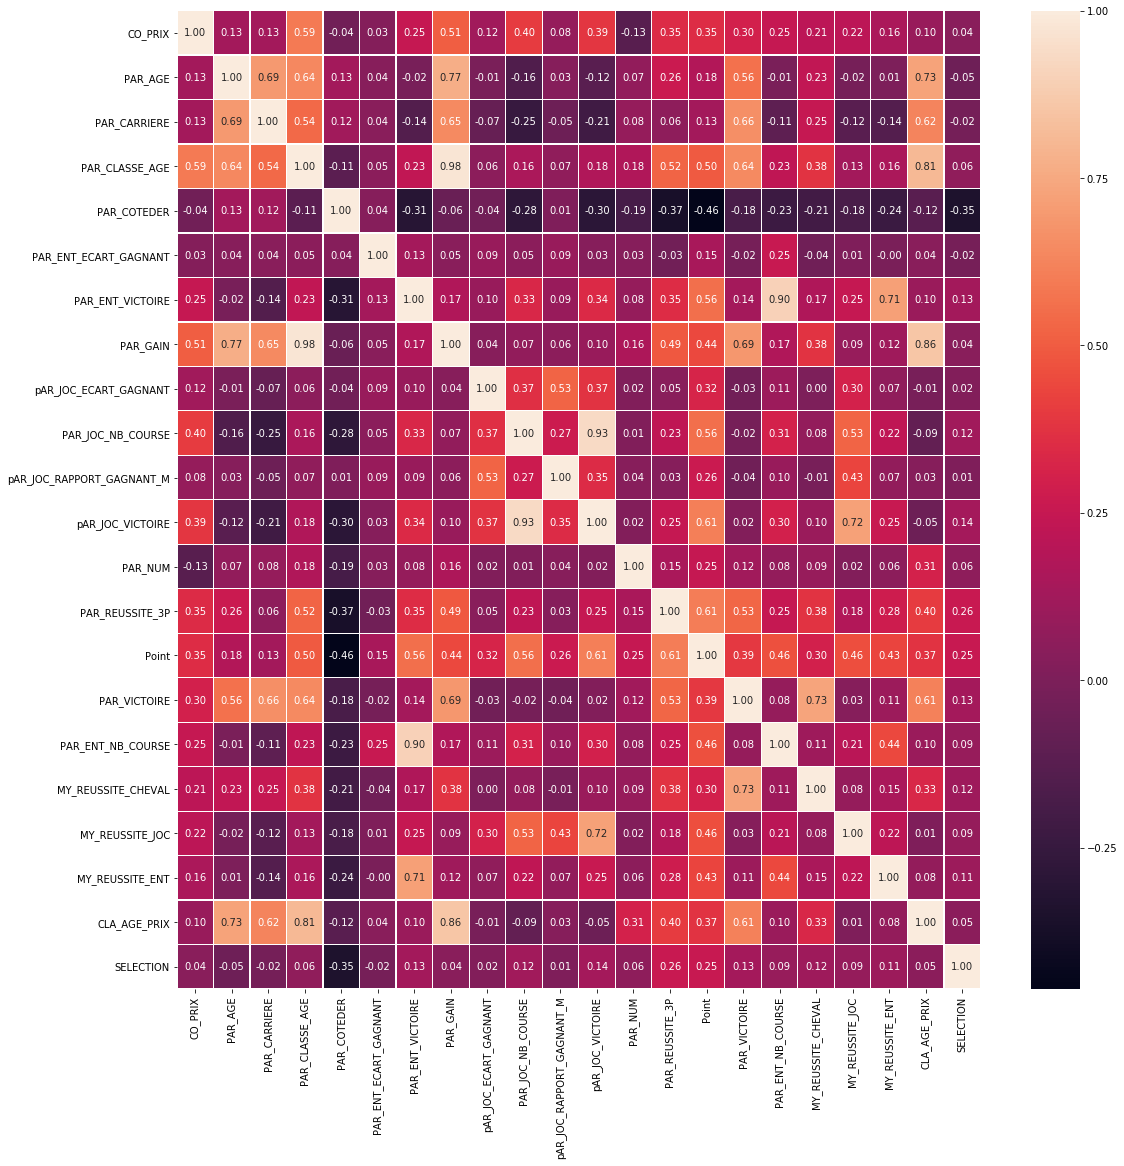

In [22]:
#Enfin, quelque chose de vraiment cool que vous pouvez mettre 

#dans une carte de chaleur est une matrice de corrélation. 
#Pandas DataFrame a une méthode corr qui calcule le coefficient de corrélation de Pearson (peut être un autre)
#entre tous les couples de colonnes numériques du DataFrame.

fig, ax = plt.subplots(figsize=(18,18))
sns.heatmap(df_gagnant.corr(), annot=True, fmt=".2f", linewidths=.2, ax=ax)


In [23]:


#print('CHEVAL_QUINTE')
#print(df_gagnant['MY_auto_start'].value_counts())


#print(df_gagnant['PAR_AGE'].sort_values())
#print(df_gagnant['MY_REUSSITE_JOC'].loc[df_gagnant['MY_REUSSITE_JOC']>=0.5,])





Proportion: 3.38 : 1
Total number of records : 37039 
Nombre de participations avec SELECTION = 0 : 28585
Nombre de participations avec SELECTION = 1  : 8454
Pourcentage 0: 77.1754%,  pourcentage 1 : 22.8246%


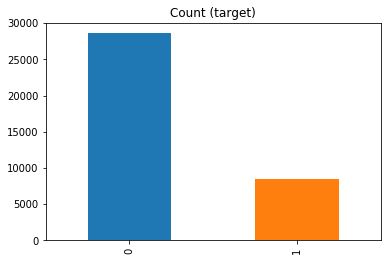

In [24]:
target_count = df_gagnant['SELECTION'].value_counts()


print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')
target_count.plot(kind='bar', title='Count (target)')

normal_trans_perc = sum(df_gagnant['SELECTION'] == 0) / (sum(df_gagnant['SELECTION'] == 0) + sum(df_gagnant['SELECTION'] == 1))
fraud_trans_perc = 1 - normal_trans_perc
print('Total number of records : {} '.format(len(df_gagnant)))
print('Nombre de participations avec SELECTION = 0 : {}'.format(sum(df_gagnant['SELECTION'] == 0)))
print('Nombre de participations avec SELECTION = 1  : {}'.format(sum(df_gagnant['SELECTION'] == 1)))
print('Pourcentage 0: {:.4f}%,  pourcentage 1 : {:.4f}%'.format(normal_trans_perc * 100,fraud_trans_perc * 100))




# Definition des set

In [25]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(df_gagnant[feature_columns],
                                                     df_gagnant[response_column], test_size=0.25, random_state=42)
train_eval_X =  df_gagnant[feature_columns]
train_eval_Y=  df_gagnant[response_column]





print("Train_x",train_x.shape)
print("Train y",train_y.shape)
print("Test x",test_x.shape)
print("Test y",test_y.shape)

print("train_eval_X",train_eval_X.shape)
print("train_eval_Y",train_eval_Y.shape)

print("Test x",test_x.shape)
print("Test y",test_y.shape)

test_y = test_y['SELECTION'].ravel()
train_y = train_y['SELECTION'].ravel()



Train_x (27779, 21)
Train y (27779, 1)
Test x (9260, 21)
Test y (9260, 1)
train_eval_X (37039, 21)
train_eval_Y (37039, 1)
Test x (9260, 21)
Test y (9260, 1)


In [26]:
def smot2(train_x,train_y,feature_columns):
    start_time=timer()
    from imblearn.combine import SMOTEENN
    from imblearn.over_sampling import SMOTE


    #print('\nOriginal dataset shape {}'.format(Counter(train_y)))
    sm = SMOTEENN(ratio='minority',n_jobs=3,random_state=42,
                          n_neighbors=10,smote=SMOTE(ratio='minority', n_jobs=3, random_state=42,m_neighbors=10))
    
    #sm = SMOTE(ratio='minority', n_jobs=3, random_state=42,m_neighbors=15)


    X_res, y_res = sm.fit_sample(train_x, train_y)

    print('\nResampled dataset shape {}'.format(Counter(y_res)))

    train_x = pd.DataFrame(X_res, columns=feature_columns)
    train_y = pd.Series(y_res)
    print("Fin SMOT")
    timer(start_time)


    return train_x,train_y

# ESTIMATEUR

In [27]:

#sample_weight = train_y.shape[0] / (2 * np.bincount(train_y))
#print("class_weight = ", sample_weight)
#sample_weight=[0.63,2.28]

#kfold = StratifiedKFold(n_splits=5)
#print(kfold)    

silence_esti=False


train_x, train_y = smot2(train_x=train_x, train_y=train_y, feature_columns=feature_columns)
test_x, test_y = smot2(train_x=test_x, train_y=test_y, feature_columns=feature_columns)



2018-06-11 16:15:46.466756


c:\python\lib\site-packages\imblearn\utils\deprecation.py:50: DeprecationWarning: 'k' is deprecated from 0.2 and will be removed in 0.4. Use 'k_neighbors' instead.
  category=DeprecationWarning)
c:\python\lib\site-packages\imblearn\utils\deprecation.py:50: DeprecationWarning: 'm' is deprecated from 0.2 and will be removed in 0.4. Use 'm_neighbors' instead.
  category=DeprecationWarning)



Resampled dataset shape Counter({1: 4000, 0: 2879})
Fin SMOT

 Time taken: 0 hours 0 minutes and 0.97 seconds.
2018-06-11 16:15:47.436274


c:\python\lib\site-packages\imblearn\utils\deprecation.py:50: DeprecationWarning: 'k' is deprecated from 0.2 and will be removed in 0.4. Use 'k_neighbors' instead.
  category=DeprecationWarning)
c:\python\lib\site-packages\imblearn\utils\deprecation.py:50: DeprecationWarning: 'm' is deprecated from 0.2 and will be removed in 0.4. Use 'm_neighbors' instead.
  category=DeprecationWarning)



Resampled dataset shape Counter({1: 1121, 0: 1120})
Fin SMOT

 Time taken: 0 hours 0 minutes and 0.36 seconds.


In [28]:

if allure_etudier == 1:
                estimator  = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=0.9, gamma=0.3, learning_rate=0.07,
                max_delta_step=4, max_depth=6, max_features=5,
                min_child_weight=13, n_estimators=1800, n_jobs=3,
                nthread=None, objective='binary:logistic', random_state=10,
                reg_alpha=0.2, reg_lambda=1, scale_pos_weight=1, seed=800,
                silent=True, subsample=0.9)


if allure_etudier == 3:
                estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=0.9, gamma=0.3, learning_rate=0.07,
                max_delta_step=4, max_depth=10, max_features='sqrt',
                min_child_weight=13, n_estimators=1300, n_jobs=1,
                nthread=None, objective='binary:logistic', random_state=10,
                reg_alpha=0.2, reg_lambda=1, scale_pos_weight=1, seed=400,
                silent=True, subsample=0.9)

if allure_etudier == 2:
                estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.4,
                colsample_bytree=0.9, gamma=0.3, learning_rate=0.07,
                max_delta_step=4, max_depth=10, max_features='sqrt',
                min_child_weight=13, n_estimators=1300, n_jobs=1,
                nthread=None, objective='binary:logistic', random_state=10,
                reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, seed=400,
                silent=True, subsample=0.9)

if allure_etudier == 4:
                 estimator =  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=0.6, gamma=0.1, learning_rate=0.07,
                max_delta_step=0, max_depth=9, max_features='sqrt',
                min_child_weight=14, n_estimators=100, n_jobs=1,
                nthread=None, objective='binary:logistic', random_state=10,
                reg_alpha=0.03, reg_lambda=1, scale_pos_weight=1, seed=27,
                silent=True, subsample=0.9)

if allure_etudier == 5:
                estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                       colsample_bytree=0.6, gamma=0.1, learning_rate=0.07,
                       max_delta_step=0, max_depth=9, max_features='sqrt',
                       min_child_weight=12, n_estimators=100, n_jobs=1,
                       nthread=None, objective='binary:logistic', random_state=10,
                       reg_alpha=0.03, reg_lambda=1, scale_pos_weight=1, seed=27,
                       silent=True, subsample=0.9)

        
model=estimator


In [29]:
#model, y_pred,predictions=my_fit2(model, train_x, train_y)
  

In [30]:
start_time=timer()
eval_set = [(train_x, train_y), (test_x, test_y)]
model.fit(train_x, train_y, eval_metric=["error", "auc"], eval_set=eval_set, verbose=False, early_stopping_rounds=300)

print("***********")
timer(start_time)          


2018-06-11 16:15:47.859427
***********

 Time taken: 0 hours 0 minutes and 9.6 seconds.


Area under the ROC curve : 0.985751


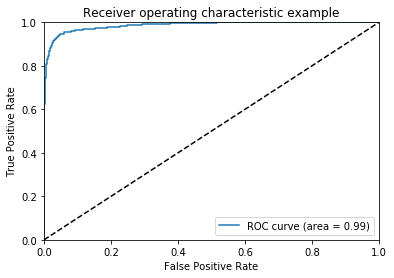

In [31]:
courbe_de_roc(estimator, test_x,test_y)

In [32]:
y_pred = model.predict(test_x)
predictions = [round(value) for value in y_pred]
PROBA = model.predict_proba(test_x)



c:\python\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [33]:
print(PROBA)

[[9.9995518e-01 4.4836186e-05]
 [9.9928743e-01 7.1258523e-04]
 [9.9900579e-01 9.9421642e-04]
 ...
 [6.4210218e-01 3.5789782e-01]
 [9.9343061e-04 9.9900657e-01]
 [5.6385994e-05 9.9994361e-01]]


In [34]:
 # evaluate predictions
accuracy = accuracy_score(test_y, predictions)
print(">>>>>>>>>>  Accuracy: %.2f%%" % (accuracy * 100.0))
        

>>>>>>>>>>  Accuracy: 94.51%


In [35]:
    print(classification_report(test_y, predictions))

             precision    recall  f1-score   support

          0       0.93      0.96      0.95      1120
          1       0.96      0.93      0.94      1121

avg / total       0.95      0.95      0.95      2241



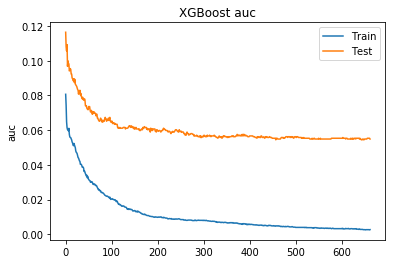

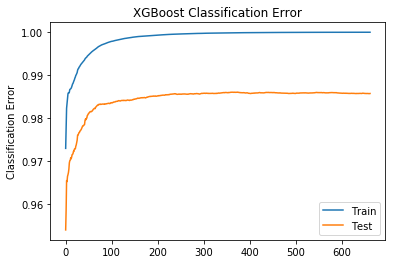


                           importance
feature                              
Point                           0.103
PAR_AGE                         0.082
PAR_NUM                         0.072
PAR_ENT_ECART_GAGNANT           0.064
PAR_VICTOIRE                    0.061
PAR_COTEDER                     0.060
CO_PRIX                         0.055
PAR_REUSSITE_3P                 0.051
MY_REUSSITE_CHEVAL              0.046
pAR_JOC_ECART_GAGNANT           0.046
pAR_JOC_RAPPORT_GAGNANT_M       0.042
PAR_ENT_NB_COURSE               0.038
PAR_JOC_NB_COURSE               0.037
PAR_CARRIERE                    0.035
MY_REUSSITE_JOC                 0.035
MY_REUSSITE_ENT                 0.035
CLA_AGE_PRIX                    0.033
pAR_JOC_VICTOIRE                0.031
PAR_ENT_VICTOIRE                0.026
PAR_GAIN                        0.025
PAR_CLASSE_AGE                  0.023


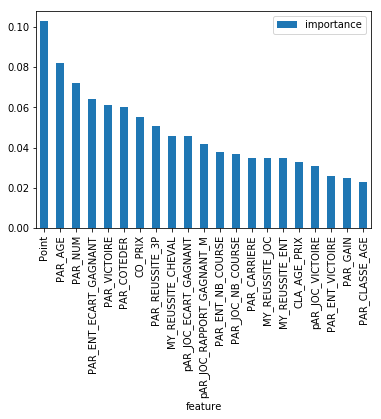

In [36]:

        # retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['auc'])
x_axis = range(0, epochs)

 # plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('auc')
pyplot.title('XGBoost auc')
pyplot.show()

        # plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['auc'], label='Train')
ax.plot(x_axis, results['validation_1']['auc'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

        #Plot_predictor_importance(best_model=model, feature_columns=featurecolums)

plot_importance(feature_columns=feature_columns,model=model)



EVAL SET ....


c:\python\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\python\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Evaluation TEST-----------------------------------------------------------------------
TEST roc_auc_score :  0.9451215432649421


c:\python\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\python\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\python\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[[2870    9]
 [   8 3992]]
[[1078   42]
 [  81 1040]]
Classification Correcte des données de test : 2118/2241    94.511%

Score  TEST  :   94.511  ************************

EVAL SET ....


c:\python\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\python\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


TRAINING roc_auc_score :  0.9974369572768322


c:\python\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\python\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[[2870    9]
 [   8 3992]]
[[1078   42]
 [  81 1040]]

 CLASSIFICATION CORRECTE DES DONNEES DE Train  : 6862/6879    99.753%
Score  TRAINING  :   99.753  ************************


c:\python\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


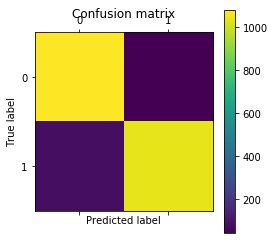

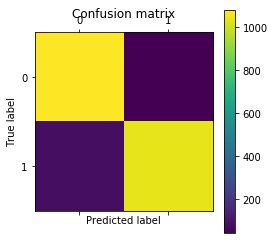

In [37]:
afficheEvalSet(model,train_x,train_y,test_x,test_y,type_eval=1)
afficheEvalSet(model,train_x,train_y,test_x,test_y,type_eval=2)

In [38]:
#kfold = StratifiedKFold(n_splits=10, random_state=None, shuffle=False)
#results = cross_val_score(model, train_x, train_y, cv=kfold)
#print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
y_pred = model.predict(test_x)
metrique_classe(y_pred=y_pred,y_true=test_y,xclass=0)
metrique_classe(y_pred=y_pred, y_true=test_y, xclass=1)



Sensibilité  du re-equilibrage des données sur le TEST
La spécificité est intuitivement la capacité du classificateur à trouver tous les échantillons positifs
Binary 
0.927743086529884

Calculer la moyenne géométrique
0.9449617562552536

 Calculer  sensitivity score
La sensibilité est le rapport où est le nombre de vrais positifs et le nombre de faux négatifs.
La sensibilité quantifie la capacité à éviter les faux négatifs.
0.9625
Sensibilité  du re-equilibrage des données sur le TEST
La spécificité est intuitivement la capacité du classificateur à trouver tous les échantillons positifs
Binary 
0.9625

Calculer la moyenne géométrique
0.9449617562552536

 Calculer  sensitivity score
La sensibilité est le rapport où est le nombre de vrais positifs et le nombre de faux négatifs.
La sensibilité quantifie la capacité à éviter les faux négatifs.
0.927743086529884


c:\python\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [39]:

#evaluation_2(model, train_x, train_y, test_x, test_y)
    


In [40]:
df_numero_a_predire = lecture_data('d:\data_jour.csv', xnames, ['IDPARTCIPANT', 'IDCOURSE'],allure=allure_etudier,avec_index=True)
print("Fichier lu d:\data_jour.csv" )



start_time=timer()

df_numero_a_predire=transformation(df_numero_a_predire,allure_etudier)

df_numero_a_predire, critere_scale =encodage(df_numero_a_predire)

df_numero_a_predire =suppression_colonne(df_numero_a_predire, allure=0)
df_numero_a_predire =suppression_colonne(df_numero_a_predire, allure=allure_etudier)
print(df_numero_a_predire.info())
print('\n')
print(feature_columns)
print(" \n ------SUPPRESSIOOn OK------------")




df_numero_a_predire['SELECTION'] = 0



train_x, test_x, train_y, test_y = split_dataset(df_numero_a_predire, 0, feature_columns, response_column)
test_y = test_y['SELECTION'].ravel()


y_pred = model.predict(test_x)
df_pred = pd.DataFrame.from_dict(y_pred)
test_copy = test_x.copy()

PROBA = model.predict_proba(test_x)
#print("PROBA \n" ,PROBA)
#print("\n")
df_proba = pd.DataFrame.from_dict(PROBA)
#print(   df_proba.head(5))

    #print("df final=")
df_final = pd.concat([df_proba, df_pred], axis=1)

    #rint(df_final.head(5))



test_x = test_copy.copy()
test_x =my_drop(test_x, 'PAR_CLASSE_AGE')

test_x =my_drop(test_x, 'PAR_ENT_ECART_GAGNANT')
test_x =my_drop(test_x, 'PAR_ENT_RAPPORT_GAGNANT_M')
test_x =my_drop(test_x, 'PAR_ENT_REU_PLACE')
test_x =my_drop(test_x, 'PAR_ENT_REUSSITE_GAGNE')
test_x =my_drop(test_x, 'PAR_ENT_VICTOIRE')
test_x =my_drop(test_x, 'PAR_GAIN')
test_x =my_drop(test_x, 'pAR_JOC_ECART_GAGNANT')
test_x =my_drop(test_x, 'PAR_JOC_ECART_PLACE')
test_x =my_drop(test_x, 'PAR_JOC_NB_COURSE')
test_x =my_drop(test_x, 'PAR_JOC_PLACE_3P')
test_x =my_drop(test_x, 'PAR_REUSSITE_GAGNE')
test_x =my_drop(test_x, 'PAR_REUSSITE_QUINTE')
test_x =my_drop(test_x, 'PAR_RUESSITE_PLACE')
test_x =my_drop(test_x, 'CO_PRIX')
test_x =my_drop(test_x, 'PAR_CARRIERE')
test_x =my_drop(test_x, 'PAR_CARRIERE_Q')
test_x =my_drop(test_x, 'pAR_JOC_RAPPORT_GAGNANT_M')
test_x =my_drop(test_x, 'pAR_JOC_REUSSITE_GAGNE')
test_x =my_drop(test_x, 'pAR_JOC_VICTOIRE')
test_x =my_drop(test_x, 'PAR_PLACE')
test_x =my_drop(test_x, 'PAR_PLACE_Q')
test_x =my_drop(test_x, 'PAR_CLASSE_AGE')
test_x =my_drop(test_x, 'pAR_JOC_VICTOIRE')
test_x =my_drop(test_x, 'PAR_REUSSITE_3P')
test_x =my_drop(test_x, 'PAR_JOC_REU_PLACE')
test_x =my_drop(test_x, 'PAR_NUM')
test_x =my_drop(test_x, 'PAR_COTEDER')
test_x =my_drop(test_x, 'CORDE')
test_x =my_drop(test_x, 'musique')
test_x =my_drop(test_x, 'CHEVAL')
test_x =my_drop(test_x, 'Nb_partant')

test_x =my_drop(test_x, 'autostart')
test_x =my_drop(test_x, 'grande_piste')
test_x =my_drop(test_x, 'cendre')

test_x =my_drop(test_x, 'PAR_PROPRIO')
test_x =my_drop(test_x, 'NOM_JOC')
test_x =my_drop(test_x, 'NOM_ENTR')

test_x =my_drop(test_x, 'HIPPO')
test_x =my_drop(test_x, 'PAR_AGE')
test_x =my_drop(test_x, 'POIDS')
test_x =my_drop(test_x, 'CO_DISTANCE')
test_x =my_drop(test_x, 'CO_PRIX')
test_x =my_drop(test_x, 'PAR_GAIN_NORMA')
test_x =my_drop(test_x, 'CHEVAL2')
test_x =my_drop(test_x, 'PAR_REUSSITE_3P2')
test_x =my_drop(test_x, 'PAR_REUSSITE_QUINTE2')
test_x =my_drop(test_x, 'PAR_CLASSE_AGE2')
test_x =my_drop(test_x, 'PAR_COTEDER2')
test_x =my_drop(test_x, 'Point')

test_x =my_drop(test_x, 'MUSIC_CHEVAL')
test_x =my_drop(test_x, 'MUSIC_ENT')
test_x =my_drop(test_x, 'MUSIC_JOC')
test_x =my_drop(test_x, 'PAR_VALEUR')

test_x =my_drop(test_x, 'MY_REUSSITE_CHEVAL')
test_x =my_drop(test_x, 'MY_REUSSITE_JOC')

test_x =my_drop(test_x, 'MY_REUSSITE_ENT')
test_x =my_drop(test_x, 'MY_ECART_JOC')
test_x =my_drop(test_x, 'CLA_AGE_PRIX')
test_x =my_drop(test_x, 'MY_auto_start')


test_x =my_drop(test_x, 'PAR_ENT_ECART_PLACE')
test_x =my_drop(test_x, 'PAR_VICTOIRE')
test_x =my_drop(test_x, 'PAR_VICTOIRE_Q')
test_x =my_drop(test_x, 'CHEVAL_QUINTE')
test_x =my_drop(test_x, 'PAR_ENT_NB_COURSE')


test_x['v0'] = 0.0
test_x['v1'] = 0.0
test_x['sel'] = 0




# test_x
cumul = 1
nb_rows = len(df_proba.index)
print("nb_rows=", nb_rows)
print(" FORMATION DU FICHIER ...",allure_etudier)
for i in range(0, nb_rows):
        n = df_proba[0][i]
        test_x['v0'][i] = n
        
        n = df_proba[1][i]
        test_x['v1'][i] = n
        

print("\n\n fin de copie sur Test_x", test_x.head(10))

if (allure_etudier == 1):
    test_x.to_csv("d:\py_resultat_trot.csv")

if (allure_etudier == 2):
    test_x.to_csv("d:\py_resultat_galop.csv")

if (allure_etudier == 3):
    test_x.to_csv("d:\py_resultat_trot_monte.csv")

if (allure_etudier == 4):
    test_x.to_csv("d:\py_resultat_haie.csv")

if (allure_etudier == 5):
    test_x.to_csv("d:\py_resultat_steeple.csv")

    

    
print("\n\n ALLER DANS APPLICATION DIABOLO ...Allure %s *********************" % allure_etudier)
timer(start_time)

Fichier lu d:\data_jour.csv
2018-06-11 16:16:00.738951


----------- TRANSFORMATION --------- AJOUT DE COLONNE------------

2018-06-11 16:16:00.738951

 Time taken: 0 hours 0 minutes and 0.01 seconds.
Suppression colonnne  0
Suppression colonnne  3
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 12 entries, (1210775, 97651) to (1210789, 97651)
Data columns (total 22 columns):
CO_PRIX                      12 non-null float64
PAR_AGE                      12 non-null int64
PAR_CARRIERE                 12 non-null float64
PAR_CLASSE_AGE               12 non-null float64
PAR_COTEDER                  12 non-null float64
PAR_ENT_ECART_GAGNANT        12 non-null int64
PAR_ENT_VICTOIRE             12 non-null float64
PAR_GAIN                     12 non-null float64
pAR_JOC_ECART_GAGNANT        12 non-null float64
PAR_JOC_NB_COURSE            12 non-null float64
pAR_JOC_RAPPORT_GAGNANT_M    12 non-null float64
pAR_JOC_VICTOIRE             12 non-null float64
PAR_NUM                      12 non

c:\python\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:




 fin de copie sur Test_x                              v0        v1  sel
IDPARTCIPANT IDCOURSE                         
1210787      97651     0.005053  0.994947    0
1210786      97651     0.996939  0.003061    0
1210775      97651     0.030577  0.969423    0
1210785      97651     0.995355  0.004645    0
1210781      97651     0.991552  0.008448    0
1210777      97651     0.955533  0.044467    0
1210776      97651     0.030312  0.969688    0
1210789      97651     0.931600  0.068400    0
1210780      97651     0.988718  0.011282    0
1210783      97651     0.986535  0.013465    0


 ALLER DANS APPLICATION DIABOLO ...Allure 3 *********************

 Time taken: 0 hours 0 minutes and 1.42 seconds.
